<a href="https://colab.research.google.com/github/GDS-Education-Community-of-Practice/DSECOP/blob/main/Spectral_Clustering/05_Conclusion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Part 5: Conclusion

In this module, we developed an embedding method derived from physical systems and we used simple clustering algorithm to solve the clustering problem in the embedding space. Although we have gained the main idea of the algorithm, there are still some subtlties about this algorithm.

First, this algorithm is unsupervised because we do not need label for the data. On the contrary, algorithms like support vector machines, logistic regression etc are supervised learning, where model is fitted against data with labels. 

Second, this algorithm is non-parametric. Parametric model is a model that assume specific mathematical form with some unspecified parameters which should be fitted against the data labels. However, in our algorithm, we did not assume any form of model and thus our model is non-parametric. Although we do not assume specific forms in the model, we need a hpyerparameter, the number of clusters we want the data to be divided into. 

Third, in constructing the similarity matrix, we used the Euclidean distance and the $\exp(-(x_i-x_j)^2)$ function. There are other choices, like nearest neighbor methods where similarity is one when the pair are the near to each other and is zero otherwise. Specifically, $K_{ij} = 1$ if $i$ is among the $n$-th nearest neighbors of $j$ and $j$ is also among the $n$-th nearest neighbors of $i$.  

Fourth, when using the k-means to do the clustering part, we need to give initialization and the result is sensitive to different initialization. Thus, in real application, multiple initializations will be given for the K-means. Then a best one will be chosen according to some criterion (such as cross-group distance and within-group distance).

Fifth, we used our own code to implement the algorithm and there are standard packages of the implementation of the algorithm in Python. We will demonstrate it here. We will use the `sklearn` package and the `SpectralClustering` function.


We will demonstrate the usage of the standard package in the concentric loop example. First get the data points

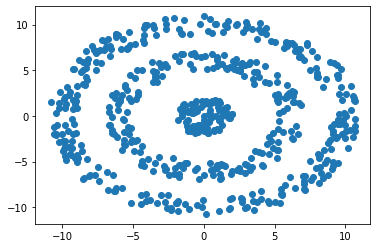

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def random_loop(min_radius, max_radius, num):
    r = np.sqrt(2*np.random.uniform(0.5*min_radius**2, 0.5*max_radius**2, num))
    theta = np.random.uniform(0, np.pi*2, num)
    return np.stack([r*np.cos(theta), r*np.sin(theta)],axis = 0).T

np.random.RandomState(2100)
data1 = random_loop(0, 2.0, 100)
data2 = random_loop(5.0, 7.0, 200)
data3 = random_loop(9.0, 11.0, 300)
data = np.concatenate([data1,data2, data3], axis = 0)

plt.figure()
plt.scatter(data[:,0], data[:,1])
plt.show()

Then we could use the standard package function to run the Spectral Clustering algorithm. We need to provide the number of clusters we want to divide the data into through the argument `n_clusters`. Then we shall provide the dimension of embedding by `n_components`. We want the clustering algorithm to be k-means and we need to provide this information via `assign_labels`. We constructed the similarity measure by the exponential function and we need to use `affinity=rbf` to specify this choice. We also need  `gamma=1` since the `rbf` function is of the form $\exp(-\gamma(x_1-x_2)^2)$ and we used $\gamma = 1$. 

After specifying all the needed settings, we could fit and predict using one function `fit_predict`.

In [5]:
from sklearn.cluster import SpectralClustering

sc = SpectralClustering(n_clusters= 3, 
                        n_components = 2, 
                        assign_labels = "kmeans", 
                        affinity = "rbf",
                        gamma = 1,
                        random_state = 2100
                       )

labels = sc.fit_predict(data)

We then could plot the result

<AxesSubplot:>

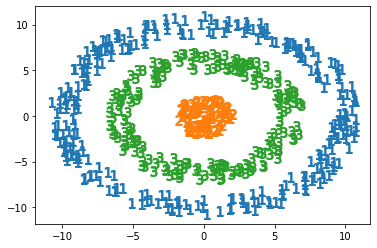

In [6]:
def plot_clustering(data, assign, ax = None):
    n = np.max(assign)+1
    if ax is None:
        ax = plt.gca()
    for i in range(n):
        ax.scatter(data[assign==i,0], data[assign==i,1], marker=f"${i+1}$", s = 20*5 )
    return ax

plot_clustering(data, labels)

This is exactly what we got in the previous section. The standard package gives the correct clustering result which is expected. The detailed documentation of the standard function can be found in 

## Homework

### Problem 1

Read the documentation of `SpectralClustering` in `sklearn` and use other methods of `assign_labels`. You can also play with the dimension of embedding to see whether you could have different result. 